In [1]:
#Importing necessary libraries 
import keras
import numpy as np
import pandas as pd
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras import models
from keras import layers
from keras import optimizers
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
# Checking the trainable status of the individual layers
for layer in resnet_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa0b4ce4f60> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa0b4d04898> True
<keras.layers.convolutional.Conv2D object at 0x7fa0b4d04588> True
<keras.layers.normalization.BatchNormalization object at 0x7fa0b4d04da0> True
<keras.layers.core.Activation object at 0x7fa0b4d04be0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa0b4c6ab38> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa0b4c6a320> True
<keras.layers.convolutional.Conv2D object at 0x7fa0b4394a58> True
<keras.layers.normalization.BatchNormalization object at 0x7fa0b42bd668> True
<keras.layers.core.Activation object at 0x7fa0b42bdf98> True
<keras.layers.convolutional.Conv2D object at 0x7fa0b42dbe80> True
<keras.layers.normalization.BatchNormalization object at 0x7fa0b42aa898> True
<keras.layers.core.Activation object at 0x7fa0b4244470> True
<keras.layers.convolutional.Conv2D object at 0x7fa0b43dadd8> True
<keras.layers.convolutional.Conv2D obj

In [5]:
# Adding classifier on top of Convolutional base
# create the model
model = models.Sequential()

In [6]:
# Add the resnet50 convolutional model
model.add(resnet_model)

# Adding new Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))


In [7]:
# Showing summary of model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 9225      
Total params: 31,986,569
Trainable params: 31,933,449
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
# Fitting the CNN to the images(Image Augmentation, Image Preprocessing)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(  
        rescale=1./255,
        shear_range=0.2,             
        zoom_range=0.2,              
        horizontal_flip=True)


In [9]:
# Normalizing the test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# setting the path to training and test set
os.chdir('/home/sachin_sharma/Desktop/jpg_data')

In [11]:
# This will create 80:20 split of training and test set 
training_set = train_datagen.flow_from_directory(
        'TrainingSet',
         target_size=(64,64),
         batch_size=32,
         class_mode='categorical')

Found 20140 images belonging to 9 classes.


In [12]:
# This will create the Test set
test_set = test_datagen.flow_from_directory(
        'TestSet',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical', 
        shuffle=False)

Found 5660 images belonging to 9 classes.


In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [14]:
# Train the model
history = model.fit_generator(
          training_set, 
          steps_per_epoch=(training_set.samples/32),
          epochs=15,
          validation_data=test_set,
          validation_steps=(test_set.samples/32))

Epoch 1/15
630/629 [==============================] - 46s 73ms/step - loss: 0.4657 - acc: 0.8705 - val_loss: 0.2416 - val_acc: 0.9465
Epoch 2/15
630/629 [==============================] - 40s 63ms/step - loss: 0.2731 - acc: 0.9319 - val_loss: 0.2602 - val_acc: 0.9535
Epoch 3/15
630/629 [==============================] - 40s 64ms/step - loss: 0.2199 - acc: 0.9429 - val_loss: 0.4624 - val_acc: 0.9021
Epoch 4/15
630/629 [==============================] - 40s 64ms/step - loss: 0.2189 - acc: 0.9492 - val_loss: 1.3513 - val_acc: 0.8394
Epoch 5/15
630/629 [==============================] - 40s 64ms/step - loss: 0.1673 - acc: 0.9576 - val_loss: 1.1552 - val_acc: 0.8769
Epoch 6/15
630/629 [==============================] - 40s 64ms/step - loss: 0.2015 - acc: 0.9593 - val_loss: 0.1912 - val_acc: 0.9604
Epoch 7/15
630/629 [==============================] - 41s 66ms/step - loss: 0.1738 - acc: 0.9617 - val_loss: 0.9895 - val_acc: 0.9004
Epoch 8/15
630/629 [==============================] - 41s 65ms

In [15]:
# saving the model
model.save('ci_a_1.h5')

In [16]:
# Visualizing the mapping between labels
training_set.class_indices


{'AnnualCrop': 0,
 'Buildup': 1,
 'Forest': 2,
 'HerbaceousVegetation': 3,
 'Highway': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'River': 7,
 'SeaLake': 8}

In [17]:
# Confusion Matrix and Classification report
Y_pred = model.predict_generator(test_set, test_set.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["AnnualCrop", "Buildup", "Forest", "HerbaceousVegetation", "Highway", "Pasture", "PermanentCrop", "River", "SeaLake"])
print(df)


Confusion Matrix
                      AnnualCrop  Buildup  Forest  HerbaceousVegetation  \
AnnualCrop                   577        0       4                     0   
Buildup                        0      857       0                     1   
Forest                         0        0     598                     0   
HerbaceousVegetation           3        1      11                   532   
Highway                        1        3       0                     0   
Pasture                        2        0      14                     5   
PermanentCrop                  7        1       3                    13   
River                          0        0       0                     0   
SeaLake                        3        0       3                     0   

                      Highway  Pasture  PermanentCrop  River  SeaLake  
AnnualCrop                  0        6              7      4        2  
Buildup                     0        0              1      1        0  
Forest          

In [18]:
print('Classification Report')
target_names = ['AnnualCrop','Buildup','Forest', 'HerbaceousVegetation', 'Highway', 'Pasture', 'PermanentCrop', 'River', 'SeaLake']
classifcn_report = classification_report(test_set.classes, y_pred, target_names=target_names)
print(classifcn_report)

Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.97      0.96      0.97       600
             Buildup       0.99      1.00      1.00       860
              Forest       0.94      1.00      0.97       600
HerbaceousVegetation       0.97      0.89      0.92       600
             Highway       0.99      0.96      0.97       600
             Pasture       0.97      0.94      0.95       600
       PermanentCrop       0.91      0.95      0.93       600
               River       0.95      0.99      0.97       600
             SeaLake       0.99      0.99      0.99       600

           micro avg       0.97      0.97      0.97      5660
           macro avg       0.96      0.96      0.96      5660
        weighted avg       0.97      0.97      0.97      5660



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


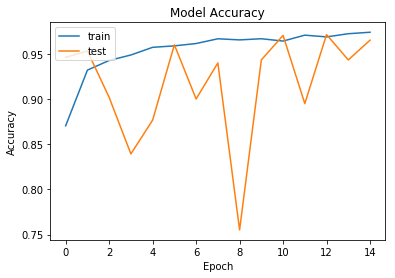

In [19]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


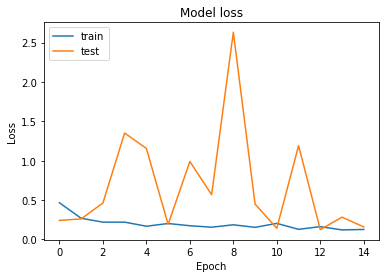

In [20]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()